In [24]:
import numpy
import os
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import sys
sys.path.append('../')
from utils import image_processing

In [61]:
data_path = "C:/Users/weijie.tay.2019/Documents/GitHub/CS701/data/public/train_label.txt"
img_dir = "C:/Users/weijie.tay.2019/Documents/GitHub/CS701/data/public/img_dir/train/"

In [66]:
by_name = {}
by_label = {k: [] for k in range(104)}
for line in open(data_path):
    parts = line.strip().split(' ')
    name = parts[0].split('.')[0] + '.jpg'
    labels = [int(x) for x in parts[1:]]
    by_name.update({name: labels})

    for label in labels:
        by_label.get(label).append(name)
 

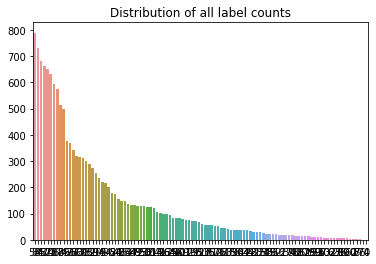

<function print>

In [37]:
keys = sorted(by_label, key=lambda k: len(by_label[k]), reverse=True)
values = [len(by_label[k]) for  k in keys]
ax = sns.barplot(x=keys, y=values, order=keys)
plt.title('Distribution of all label counts')
plt.show()

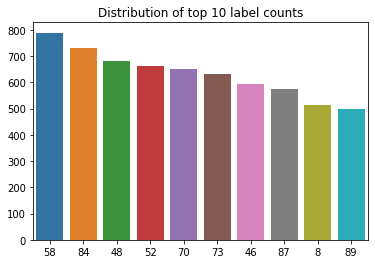

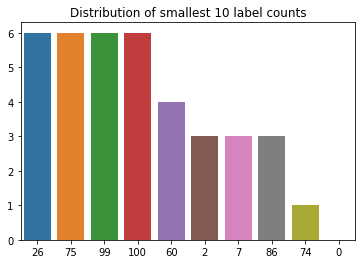

In [39]:
ax = sns.barplot(x=keys[:10], y=values[:10], order=keys[:10])
plt.title('Distribution of top 10 label counts')
plt.show()

ax = sns.barplot(x=keys[-10:], y=values[-10:], order=keys[-10:])
plt.title('Distribution of smallest 10 label counts')
plt.show()

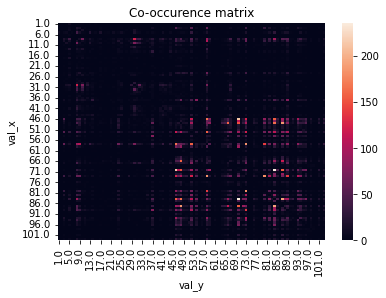

In [57]:
## Coocurence matrix
occ = list(by_name.values())
df = pd.DataFrame(occ).stack().rename('val').reset_index().drop(columns='level_1')

df = df.merge(df, on='level_0').query('val_x != val_y')
coocur = pd.crosstab(df.val_x, df.val_y)

sns.heatmap(coocur)
plt.title('Co-occurence matrix')
plt.show()

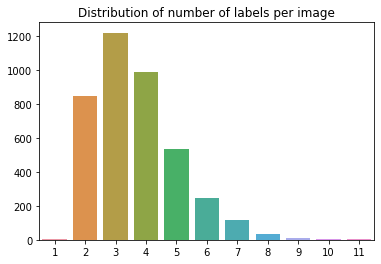

In [73]:
from collections import Counter
lengths = [len(by_name[k]) for k in list(by_name.keys())]
counts = Counter(lengths)

ax = sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title('Distribution of number of labels per image')
plt.show()

# Probably not very useful

In [ ]:
# image = image_processing.read_image(img_dir + list(by_name.keys())[0])
image = image_processing.read_image(img_dir + '00000000.jpg')
print(np.array(image))

## Still working on more analysis

### Possible Augmentation

Brighten/Lighten the image